### Objective

The main objective is to predict the sentiment for several movie reviews obtained from the Internet Movie Database (IMDb).

#### Dataset Description

This dataset contains 50,000 movie reviews that have been pre-labeled with “positive” and “negative” sentiment class labels based on the review content. The dataset can be obtained from Kaggle.

Hence, our task will be to predict the sentiment of 15,000 labelled movie reviews and use the remaining 35,000 reviews for training our supervised models.

<b>Install and import the libraries.</b>

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
#nltk.download('sentiwordnet')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#import text_normalizer as tn
nlp = spacy.load('en_core_web_lg')

from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


<b>Importing Data and Data Analysis</b>

In [59]:
imdb_data=pd.read_csv('IMDB_Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [60]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [61]:
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Text Preprocessing

Cleaning, pre-processing, and normalising text to bring text components like phrases and words to some standard format is one of the key steps before going into the process of feature engineering and modelling.

<b>Text normalization</b>

Words are tokenized. To separate a statement into words, we utilise the word tokenize () method.

In [62]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

<b>Removing html strips and noise text</b>

Here in data head we can see some html code so first we need to clean that html strips. Also removing some noisy texts along with square brackets.

In [63]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

C:\Users\ragha\AppData\Local\Temp\ipykernel_7444\484596594.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


<b>Removing special characters</b>

Because we’re working with English-language evaluations in our dataset, we need to make sure that any special characters are deleted.

In [64]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

<b>Text stemming</b>

Stemming is a technique for eliminating affixes from words in order to retrieve the base form. It’s the same as pruning a tree’s branches down to the trunk. The stem of the terms eating, eats, and eaten, for example, is eat.

In [66]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

<b>Removing stopwords and normalization</b>

Stop words are words that have little or no meaning, especially when synthesising meaningful aspects from the text.<b> Stopwords include words such as a, an, the, and others.

In [65]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{"it's", 'are', "shan't", 'won', 'doesn', 'most', 'was', 'up', 're', 'not', 'mightn', 'themselves', 'couldn', 'than', 'because', 'his', 'down', 'more', 'under', "mustn't", 'weren', 'theirs', 'ourselves', 'until', 'were', 'during', 'which', "hasn't", "she's", 'who', 'shouldn', 'is', "haven't", 'it', 'ain', 'what', 'himself', 'or', 'why', 'very', 'whom', 'an', 'll', "that'll", "didn't", 'am', 'those', 'once', "doesn't", "shouldn't", 'few', 'too', 'be', 'haven', 'other', "you're", 'into', 'each', 'about', 'o', 'the', 'they', 'same', 'aren', 'myself', 'isn', "isn't", 'hadn', "mightn't", 'at', 'while', 'mustn', 'he', 'off', 'own', 'y', 'm', 'and', 'how', 've', 'some', 'wasn', 'but', 'having', 'again', "wouldn't", 'to', 'its', 'yourselves', 'their', 'no', 'below', 'this', 'can', 't', "couldn't", 'shan', 'i', 'don', 'd', 'where', 'here', "don't", 'a', 'ma', 'against', 'there', "weren't", 'we', 'your', 'in', 'hers', "you'll", 'after', 'then', 'for', 'these', 'my', 'further', 'if', 'doing', 'yo

<b>Normalize text corpus</b>

<b>Bag of words Model</b>

It’s used to turn text files into numerical vectors or a bag of words.

The Bag of Words (BoW) model is the most basic type of numerical text representation. A phrase can be represented as a bag of words vector, just like the term itself (a string of numbers).

In [71]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (35000, 5469103)
BOW_cv_test: (15000, 5469103)


<b>Term Frequency-Inverse Document Frequency model (TFIDF)</b>

It is used to convert text documents to matrix of tfidf features.

The term frequency-inverse document frequency statistic is a numerical measure of how essential a word is to a document in a collection.

In [72]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (35000, 5469103)
Tfidf_test: (15000, 5469103)


Vectorizer used Above: Word Embeddings, also known as Word Vectorization, is an NLP technique for mapping words or phrases from a lexicon to a corresponding vector of real numbers, which can then be used to derive word predictions and semantics. Vectorization is the process of translating words into numbers.<br>
<b>Labeling the sentiment text and splitting sentiment data</b><br>
Label Binarizer is a SciKit Learn class that takes Categorical data and outputs a Numpy array. Unlike Label Encoder, it encodes data into dummy variables that indicate whether a specific label is present or not. Label Binarizer is used to encode column data.

In [75]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)
#Spliting the sentiment data
train_sentiments=sentiment_data[:35000]
test_sentiments=sentiment_data[35000:]
print(train_sentiments)
print(test_sentiments)

(50000, 1)
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


<b>Modelling the dataset using Multinormal Naive Bayes</b>

Let us build Multinomial Naive Bayes model for both bag of words and tfidf features

The Multinomial Nave Bayes algorithm considers a feature vector in which each term reflects the number of times it appears or how frequently it appears, i.e. frequency.

<b>Model Training</b>

Training the model for both the approach both bag of words and tfidf features.

In [76]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


<b>Model performance on test data</b>

Model performance by predicting the model for both the approach both bag of words and tfidf features.

In [77]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


<b>Accuracy of the model</b>

Accuracy for both the approach both bag of words and tfidf features

In [78]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7374
mnb_tfidf_score : 0.7369333333333333


<b>Visualizing the classification report</b>

Visualizing the classification report for both BoW and TFIDF.

In [79]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.74      0.74      7490
    Negative       0.74      0.73      0.74      7510

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

              precision    recall  f1-score   support

    Positive       0.73      0.75      0.74      7490
    Negative       0.74      0.73      0.73      7510

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



#### Confusion matrix

In [80]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[5484 2026]
 [1913 5577]]
[[5461 2049]
 [1897 5593]]


#### Visualizing Positive and Negative words by using WordCloud

You’ve probably seen a cloud packed with many words of varying sizes that signify the frequency or importance of each word. This is referred to as a Tag Cloud or a WordCloud.

<b>Word cloud for positive review words</b>

<function matplotlib.pyplot.show(close=None, block=None)>

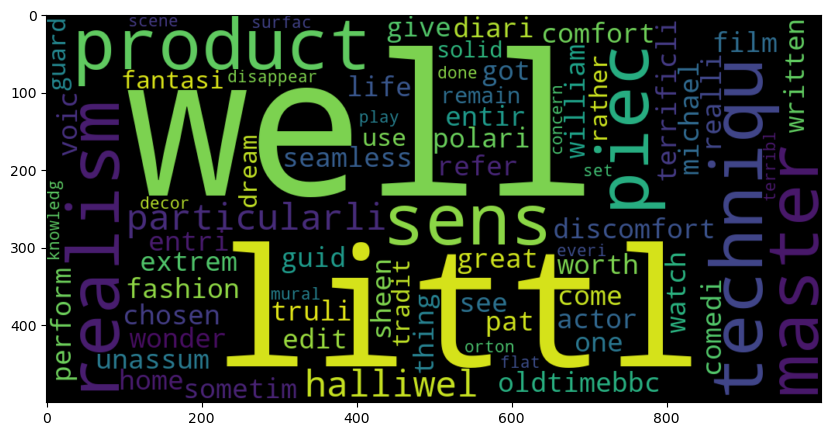

In [82]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<b>Word cloud for negative review words</b>

<function matplotlib.pyplot.show(close=None, block=None)>

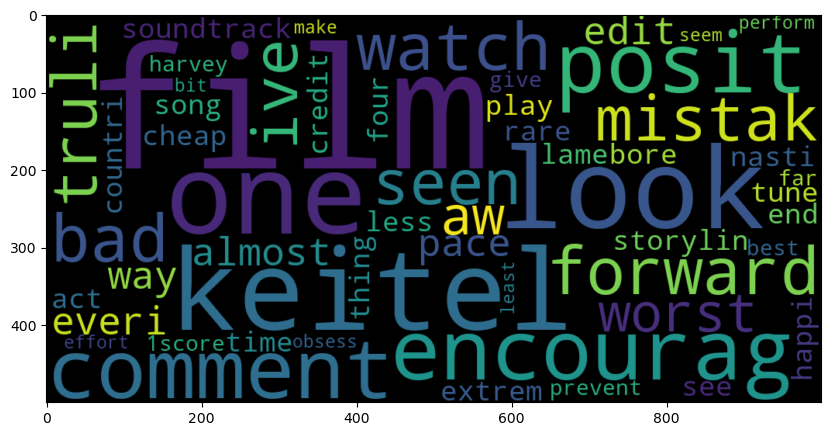

In [84]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

<b>Modelling the dataset using Logistic Regression</b>

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_reviews)

# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_train_features = tv.fit_transform(train_reviews)

In [86]:
# transform test reviews into features
cv_test_features = cv.transform(test_reviews)
tv_test_features = tv.transform(test_reviews)

In [87]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2277209)  Test features shape: (15000, 2277209)
TFIDF model:> Train features shape: (35000, 2277209)  Test features shape: (15000, 2277209)


<b>Model Training, Prediction and Performance Evaluation</b>

In [88]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [89]:
# Logistic Regression model on BOW features
lr.fit(cv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(cv_test_features) 

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
score = lr.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 90.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 90.0%')

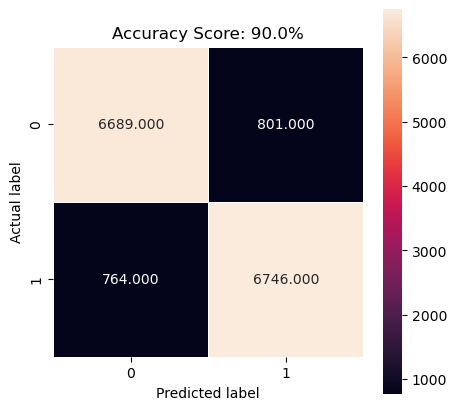

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [92]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7490
           1       0.89      0.90      0.90      7510

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [93]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted'))) 

Accuracy:  89.57% 
Precision: 89.57% 
Recall:    89.57% 
F1 Score:  89.57% 


<b>Logistic Regression using TFIDF features</b>

In [94]:
# Logistic Regression model on BOW features
lr.fit(tv_train_features,train_sentiments)
# predict using model
predictions = lr.predict(tv_test_features) 

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
score = lr.score(tv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 89.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 89.0%')

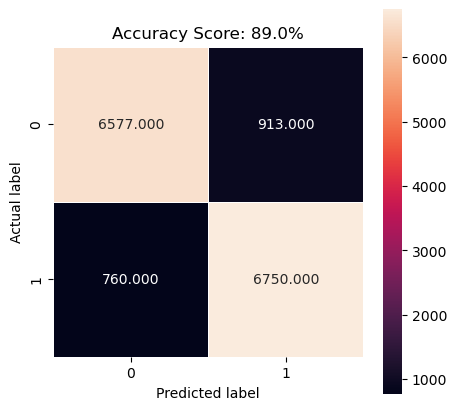

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [97]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7490
           1       0.88      0.90      0.89      7510

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [98]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted'))) 

Accuracy:  88.85% 
Precision: 88.86% 
Recall:    88.85% 
F1 Score:  88.85% 


<b>SVM model using BOW features</b>

In [99]:
# SVM model on BOW features
svm.fit(cv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(cv_test_features) 

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 89.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 89.0%')

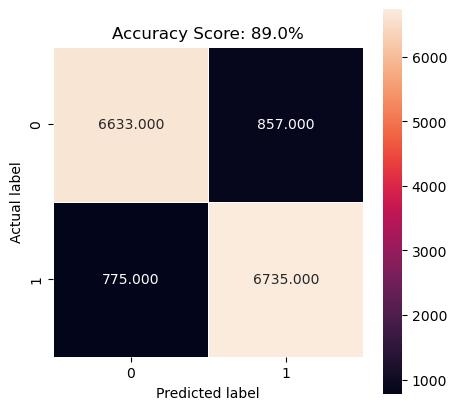

In [101]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [102]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7490
           1       0.89      0.90      0.89      7510

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



<b>SVM model using TF-IDF features</b>

In [104]:
# SVM model on TF-IDF features
svm.fit(tv_train_features,train_sentiments)
# predict using model
predictions = svm.predict(tv_test_features) 

C:\Users\ragha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
score = svm.score(cv_test_features,test_sentiments)
print("Accuracy score:",np.round(score,2)*100,"%")

Accuracy score: 87.0 %


Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 87.0%')

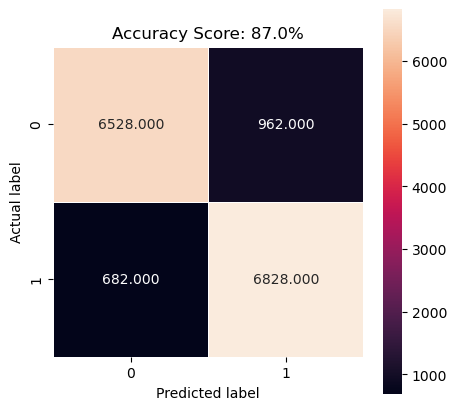

In [106]:
cm = metrics.confusion_matrix(test_sentiments, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [107]:
from sklearn.metrics import classification_report
print("Classification report\n")
print(classification_report(test_sentiments, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7490
           1       0.88      0.91      0.89      7510

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [108]:
from sklearn import metrics
print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(test_sentiments, predictions)))
print('Precision: {:2.2%} '.format(metrics.precision_score(test_sentiments, predictions, average='weighted')))
print('Recall:    {:2.2%} '.format(metrics.recall_score(test_sentiments, predictions, average='weighted')))
print('F1 Score:  {:2.2%} '.format(metrics.f1_score(test_sentiments, predictions, average='weighted')))  

Accuracy:  89.04% 
Precision: 89.09% 
Recall:    89.04% 
F1 Score:  89.04% 


<b>Word cloud for positive review words</b>

<function matplotlib.pyplot.show(close=None, block=None)>

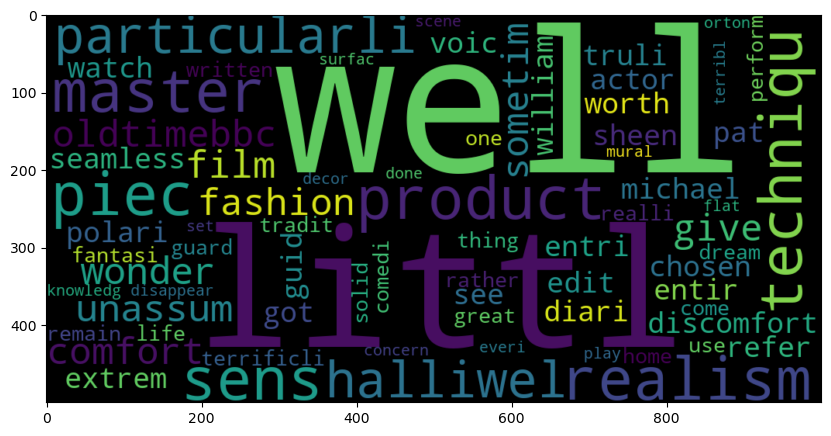

In [125]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

#### Word cloud for negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

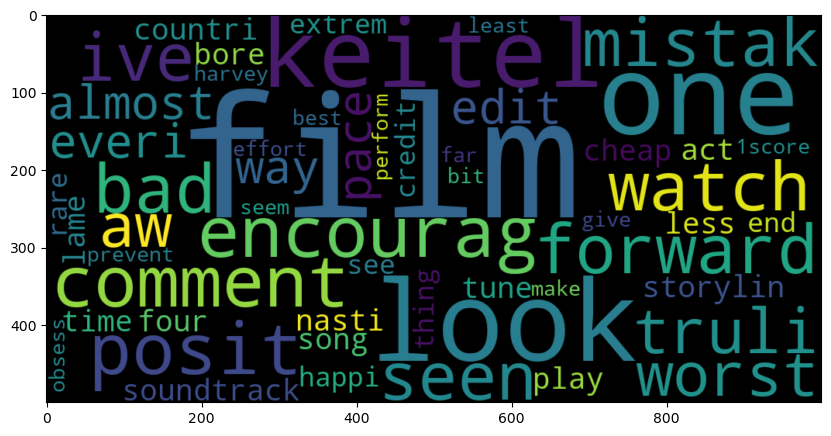

In [126]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show